<a href="https://colab.research.google.com/github/frfusch21/DTS_GGU_5/blob/master/GGU5_All_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# **Read Dataset**

In [54]:
df = pd.read_csv('all-data_clean.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614
...,...,...,...,...,...,...,...,...,...,...,...,...
90282,90283,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756,N,91,43,70
90283,90284,Bogotá,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622,N,138169,5934,354
90284,90285,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717,N,104,49,96
90285,90286,Quito,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428,N,633,3296,150


# **Data Analysis**

In [55]:
df.shape

(90287, 12)

In [56]:
df.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,90287.000000,90287.000000,90287.000000,90287.000000,90287.000000,9.028700e+04,9.028700e+04,9.028700e+04
mean,45144.000000,0.400130,0.399127,-87.114696,9.000339,3.505614e+04,1.751764e+05,9.637481e+06
std,26063.756214,0.230801,0.230811,12.752674,12.547121,8.947615e+05,2.370332e+07,4.497338e+08
min,1.000000,0.000009,0.000009,-123.341828,-53.158163,-2.207486e+08,-2.147484e+09,0.000000e+00
25%,22572.500000,0.200113,0.199008,-100.162537,-0.203951,4.930000e+02,2.278000e+03,8.800000e+01
50%,45144.000000,0.400801,0.398292,-79.023126,4.562602,9.330000e+02,4.668000e+03,2.140000e+02
75%,67715.500000,0.600672,0.599134,-78.484563,21.839787,1.924500e+03,8.872000e+03,4.840000e+02
max,90287.000000,0.799438,0.799223,174.811881,60.321647,7.696342e+07,2.147484e+09,9.516306e+10


In [57]:
df.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

In [58]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [59]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [60]:
app_df = df[['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
app_df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363
1,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971
2,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387
3,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294
4,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862


In [61]:
app_df

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363
1,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971
2,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387
3,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294
4,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862
...,...,...,...,...,...,...
90282,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756
90283,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622
90284,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717
90285,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428


# **Mapping data based on location**

In [62]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import geopandas as gpd
from shapely.geometry import Point

In [64]:
shape_df = gpd.read_file('/content/gis/Americas_Cities.shp')

In [65]:
#Pickup Coordinates Mapping
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(app_df['pickup_longitude'], app_df['pickup_latitude'])]
geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


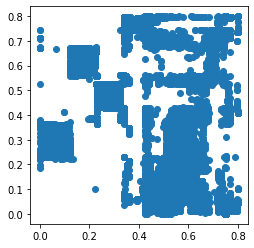

In [66]:
geo_df.plot()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


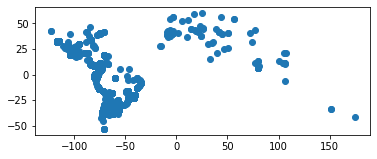

In [67]:
#Dropoff Coordinates
loc_crs1 = {'init': 'epsg:4326'}
loc_geom1 = [Point(xy) for xy in zip(app_df['dropoff_longitude'], app_df['dropoff_latitude'])]
geo_df1 = gpd.GeoDataFrame(app_df, crs=loc_crs1, geometry=loc_geom1)
geo_df1.plot()

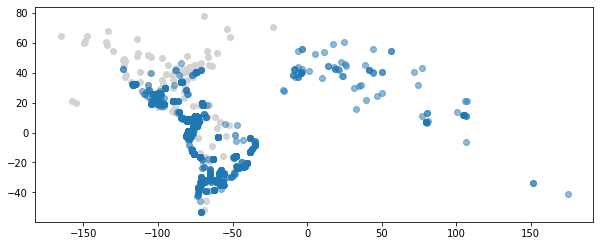

In [68]:
#Pickup Layoff Transport Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

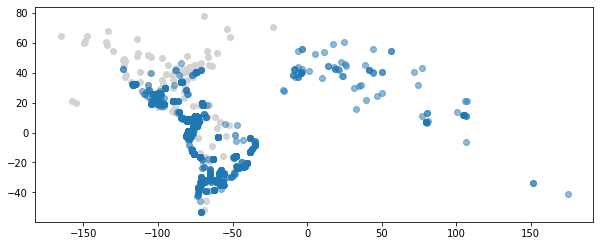

In [69]:
#Dropoff Layoff Transport Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [70]:
shape_df1 = gpd.read_file('/content/gis/Americas_Cities.shp')

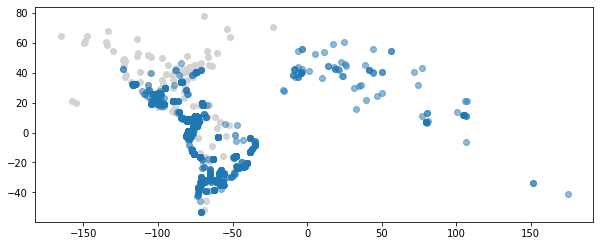

In [71]:
#Pickup Layoff Traffic Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

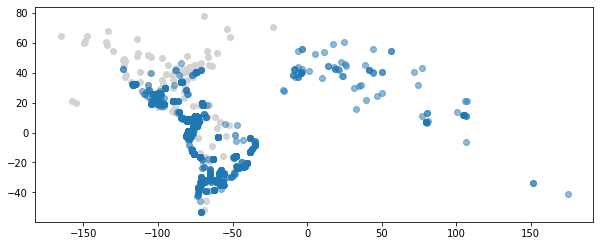

In [72]:
#Dropoff Layoff Traffic Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

# **Data Preprocessing**

In [73]:
# Label Encoder
le = LabelEncoder()
# df['vendor_name'] = df['vendor_id']
df['vendor_id']= le.fit_transform(df['vendor_id'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,43,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,71,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,71,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,71,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [74]:
df = df.drop(columns=['id','pickup_datetime','dropoff_datetime'])


In [75]:
X = df.iloc[:,:-4]
y = df.iloc[:,-2]

In [76]:
X

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,97,0.632055,0.528947,-78.549447,-0.361363
1,43,0.327804,0.391950,-103.366600,20.686971
2,71,0.140910,0.563280,-100.165737,25.619387
3,71,0.207565,0.590416,-100.491721,25.676294
4,71,0.128881,0.580419,-100.104166,25.643862
...,...,...,...,...,...
90282,97,0.706498,0.552770,-78.550306,-0.256756
90283,10,0.369432,0.762872,-74.050725,4.714622
90284,81,0.089643,0.308893,-99.194622,19.396717
90285,97,0.431407,0.724499,-78.446296,-0.327428


# **Split Train and Test Data**

In [77]:
#Split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [78]:
X_train

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
63614,75,0.170725,0.645192,-100.297703,25.749973
73405,79,0.069727,0.289050,-99.085916,19.320387
77670,97,0.616406,0.127264,-78.479766,-0.181977
88372,80,0.039849,0.314849,-99.153652,19.406687
32937,74,0.193767,0.644905,-100.314799,25.733611
...,...,...,...,...,...
6265,97,0.514690,0.048302,-78.486794,-0.134009
54886,117,0.360790,0.734496,-70.714968,-33.434408
76820,97,0.625218,0.387018,-78.459439,-0.115511
860,71,0.153944,0.620221,-100.184847,25.647268


In [79]:
X_train.to_csv("x-train.csv")

In [80]:
len(y_train), len(y_test)

(67715, 22572)

# **Feature Engineering**

In [81]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

# Fit and Transform both training and testing data
X_train = feature_scaler.fit_transform(X_train.values)
X_test = feature_scaler.fit_transform(X_test.values)
# y_train = y_train.values
# y_test = y_test.values
y_train = label_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = label_scaler.fit_transform(y_test.values.reshape(-1, 1))

In [82]:
X_test.shape

(22572, 5)

# **Tensorflow Regression**

In [83]:
#Regression distance meter with Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
tf.random.set_seed(42)  #first we set random seed

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(20, activation='relu', name="Hidden_Layer_1"), 
    tf.keras.layers.Dense(18, activation='relu', name="Hidden_Layer_2"),
    tf.keras.layers.Dense(8, activation='relu', name="Hidden_Layer_3"), 
    tf.keras.layers.Dense(1, activation='sigmoid', name="Output"),
])

model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
history = model.fit(epochs=100, x=X_train, y=y_train,
          validation_data=(X_test, y_test))

Epoch 1/100
2117/2117 [==============================] - 5s 2ms/step - loss: 0.0794 - mae: 0.0794 - val_loss: 0.0177 - val_mae: 0.0177
Epoch 2/100
2117/2117 [==============================] - 4s 2ms/step - loss: 0.0203 - mae: 0.0203 - val_loss: 0.0163 - val_mae: 0.0163
Epoch 3/100
2117/2117 [==============================] - 4s 2ms/step - loss: 0.0196 - mae: 0.0196 - val_loss: 0.0160 - val_mae: 0.0160
Epoch 4/100
2117/2117 [==============================] - 4s 2ms/step - loss: 0.0194 - mae: 0.0194 - val_loss: 0.0158 - val_mae: 0.0158
Epoch 5/100
2117/2117 [==============================] - 4s 2ms/step - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0158 - val_mae: 0.0158
Epoch 6/100
2117/2117 [==============================] - 4s 2ms/step - loss: 0.0193 - mae: 0.0193 - val_loss: 0.0157 - val_mae: 0.0157
Epoch 7/100
2117/2117 [==============================] - 4s 2ms/step - loss: 0.0192 - mae: 0.0192 - val_loss: 0.0157 - val_mae: 0.0157
Epoch 8/100
2117/2117 [==============================] 

# **Model Evaluation**

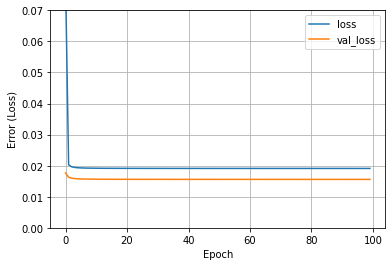

In [84]:
#Plot lost history
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,0.07])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [85]:
# Model evaluation on testing dataset
model.evaluate(X_train, y_train)

2117/2117 [==============================] - 3s 1ms/step - loss: 0.0191 - mae: 0.0191


[0.019110513851046562, 0.019110513851046562]

# **Save Model**

In [86]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
#Saving model keras
model.save("Reg_Dist.h5")

In [88]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Deploy Model**

In [94]:
from flask import Flask
from flask import jsonify, request
from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/', methods=['GET'])
def index():
  return jsonify({"Nama":"Farah Y"})

@app.route('/predictDist', methods=['GET'])
def result():
  data = request.json
  df = pd.read_csv('x-train.csv', index_col=0)
  df1 = pd.DataFrame(data, index=[0])

  vendor_id = df1['vendor_id']
  X = feature_scaler.fit_transform(df.values)
  X = feature_scaler.transform(df1.values)
  # predict distance

  Reg_Dist=load_model('Reg_Dist.h5')

  prediction = Reg_Dist.predict(X)
  prediction = label_scaler.inverse_transform(prediction.reshape(-1,1)).reshape(-1)

  dist_meters = prediction/3/10000
  data1 = {"vendor_id":vendor_id, "dist_km":dist_meters}
  df2 = pd.DataFrame(data1, columns=['vendor_id','dist_km'])
  

  # predict duration
  df_dur = pd.read_csv('x-train_dur.csv', index_col=0)
  df_dur1 = pd.DataFrame(df2, index=[0])
  X_Dur = feature_scaler.fit_transform(df_dur.values)
  X_Dur = feature_scaler.transform(df2.values)

  Reg_Dur = load_model('Reg_Trip_Dur.h5')
  pred_dur = Reg_Dur.predict(X_Dur)
  pred_dur = label_scaler.inverse_transform(pred_dur.reshape(-1,1)).reshape(-1)
  pred_dur_min = pred_dur/60/140000
  data2 = {"vendor_id":vendor_id, "pred_dur_min":pred_dur_min, "dist_km":dist_meters,}
  # print(data2)

  df2 = pd.DataFrame(data2, columns=['vendor_id','pred_dur_min','dist_km',])
  df2['vendor_id'] = df2['vendor_id'].astype('int64')
  # print(df2)

  tarif = pd.read_csv('taxi_fare.csv')
  tarif['base_fare'] = tarif['base_fare'].fillna(tarif['base_fare'].mean())

  # # label encoder
  tarif['vendor_id']= le.transform(tarif['vendor_name']) 
  df2_merge = df2.merge(tarif, how='left', on='vendor_id')
  df2_merge = df2_merge.drop(columns=['fare_per_minute'])
  def total_fare(df2_merge):
    if df2_merge['dist_km']< 1:
      return df2_merge['base_fare']
    else:
      return df2_merge['base_fare']+((df2_merge['dist_km'])*df2_merge['fare_per_km'])
  df2_merge = df2_merge.assign(total_fare_km=df2_merge.apply(total_fare, axis=1))
  # df2_merge = df.reset_index(drop=True)
  df2_merge = df2_merge.drop(columns=['vendor_name'])
  # df_UI = df2_merge.drop(columns=['total_fare_km'])
  # print("User input: \n", df_UI)
  print("Result Fare: \n", df2_merge)
  
  # print(df2)
  # data['Prediction'] = prediction[0]

  return jsonify({"Status":"Berhasil"})

if __name__ == "__main__":
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f4a4-34-125-197-175.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [27/Jul/2022 11:42:03] "GET /predictDist HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Jul/2022 11:42:03] "GET /predictDist HTTP/1.1" 200 -


Result Fare: 
    vendor_id  pred_dur_min   dist_km  base_fare  fare_per_km  total_fare_km
0         83     21.991032  3.498675       1.95         0.74        4.53902


127.0.0.1 - - [27/Jul/2022 11:42:07] "GET /predictDist HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Jul/2022 11:42:07] "GET /predictDist HTTP/1.1" 200 -


Result Fare: 
    vendor_id  pred_dur_min   dist_km  base_fare  fare_per_km  total_fare_km
0         84     22.251904  3.498566       0.34         0.17       0.934756
